In [10]:
import pandas as pd

# Load the data from the provided CSV file
file_path = 'C:/Users/igor/Desktop/portfolio/python/ext_online_sales.csv'
data = pd.read_csv(file_path, sep=';')

# Displaying the first few rows of the dataset to understand its structure
data.head()

,SALE_DATE_DT,country_id,country_name,country_code,book_id,book_name,genre_id,author_id,FORMAT_id,books_price,...,author_last_name,BOOK_FORMAT,PAYMENT_METHOD_ID,PAYMENT_METHOD_name,online_add_channel_id,online_add_channel_name,Shipping Method_id,Shipping_Method_name,web,web_id
0,01.01.2020 20:00,4,Poland,PL,1908,THE RADETZKY MARCH (1932),6,1406,1,"12,9",...,BECHDEL,Kindle (Amazon Kindle Format),1,Apple Pay,1,Instagram Ads,2,Economy Shipping,mybooks.lt,2
1,01.01.2020 4:45,2,Latvia,LV,3011,THE MUSEUM OF INNOCENCE (2008),9,2288,2,"10,02",...,KLOSTERMAN,Paperback,2,Venmo,1,Instagram Ads,3,Free Shipping,read.lt,3
2,01.01.2020 4:23,4,Poland,PL,2431,THE KEY TO REBECCA (1980),9,2368,1,"13,14",...,PRIEST,Kindle (Amazon Kindle Format),3,Bank Transfer,2,YouTube Ads,4,Freight Shipping,allbooks.lt,4
3,01.01.2020 13:43,1,Lithuania,LT,896,DAVID COPPERFIELD (1850),6,51,3,"10,53",...,BORGES,Audiobook (Digital or Physical),3,Bank Transfer,3,Twitter Ads,5,Courier Service,mybooks.lt,2
4,01.01.2020 21:02,5,Belarus,BY,2373,TAKING LIVES (1999),11,2089,2,"12,02",...,DASHNER,Paperback,4,Debit Card,4,Amazon Advertising,6,Local Pickup,read.lt,3


In [11]:
# 1. Loading and preliminary data analysis

# Checking DataFrame information
data_info = data.info()

# Check for missing values
missing_values = data.isnull().sum()

# Print information and first 10 columns with missing values
data_info, missing_values.head(10)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SALE_DATE_DT             99999 non-null  object
 1   country_id               99999 non-null  int64 
 2   country_name             99999 non-null  object
 3   country_code             99999 non-null  object
 4   book_id                  99999 non-null  int64 
 5   book_name                99999 non-null  object
 6   genre_id                 99999 non-null  int64 
 7   author_id                99999 non-null  int64 
 8   FORMAT_id                99999 non-null  int64 
 9   books_price              99999 non-null  object
 10  AMOUNT                   99999 non-null  int64 
 11  customer_id              99999 non-null  int64 
 12  customer_first_name      99999 non-null  object
 13  customer_last_name       99999 non-null  object
 14  user_name                99999 non-nul

(None,
 SALE_DATE_DT    0
 country_id      0
 country_name    0
 country_code    0
 book_id         0
 book_name       0
 genre_id        0
 author_id       0
 FORMAT_id       0
 books_price     0
 dtype: int64)

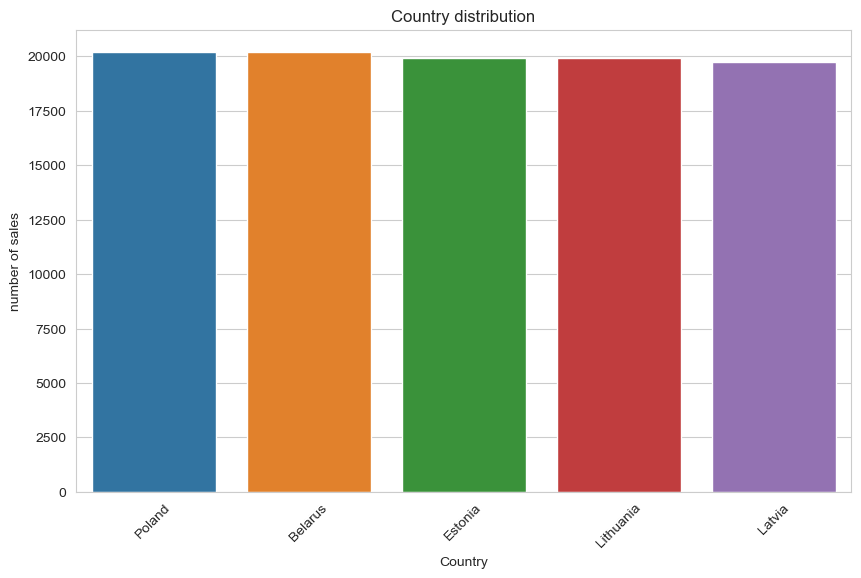

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales for each country
sales_by_country = data['country_name'].value_counts()

# Results visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title('Country distribution')
plt.xlabel('Country')
plt.ylabel('number of sales')
plt.xticks(rotation=45)
plt.show()


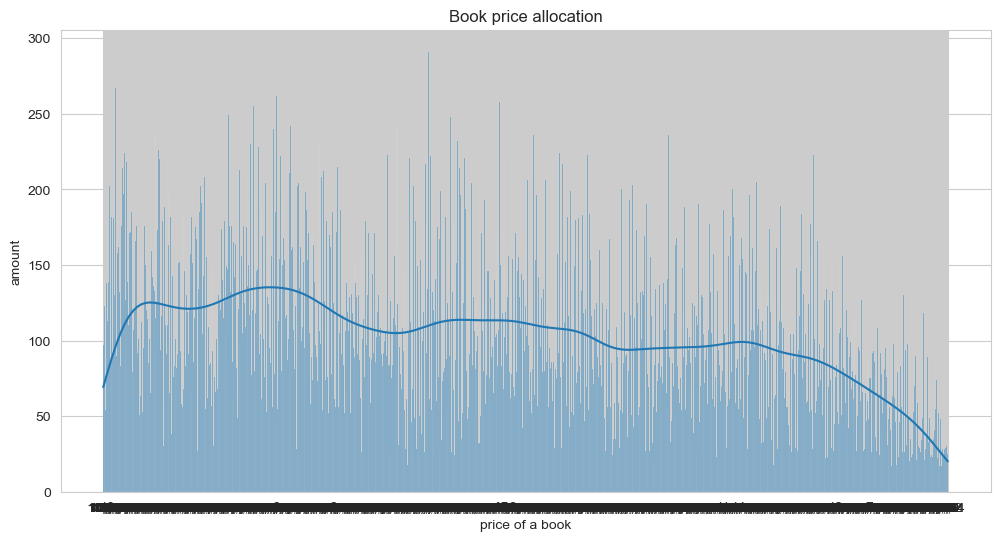

C:\Users\igor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


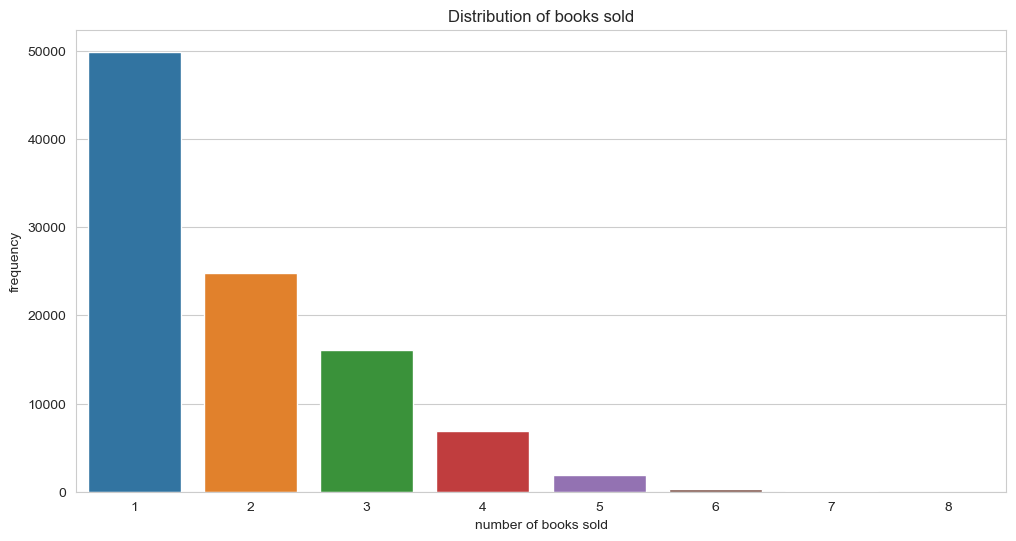

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of book prices
plt.figure(figsize=(12, 6))
sns.histplot(data['books_price'], bins=30, kde=True)
plt.title('Book price allocation')
plt.xlabel('price of a book')
plt.ylabel('amount')
plt.show()

# Plotting the distribution of sales amount
plt.figure(figsize=(12, 6))
sns.countplot(data['AMOUNT'])
plt.title('Distribution of books sold')
plt.xlabel('number of books sold')
plt.ylabel('frequency')
plt.show()


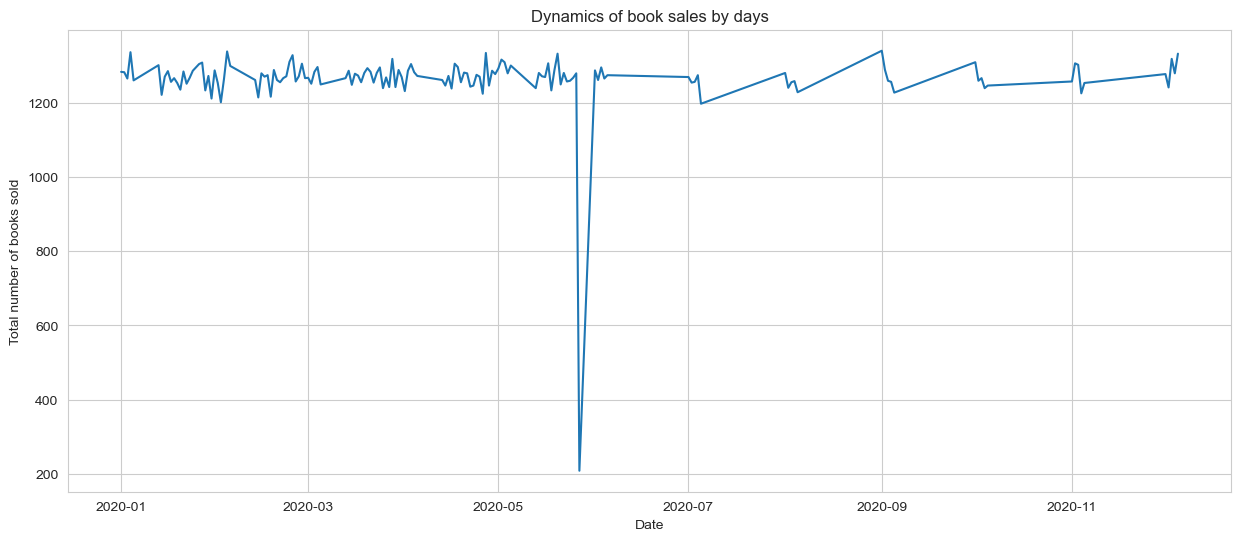

In [18]:
# Convert 'SALE_DATE_DT' to datetime format
data['SALE_DATE_DT'] = pd.to_datetime(data['SALE_DATE_DT'])

# Now perform your grouping and summing
sales_over_time = data.groupby(data['SALE_DATE_DT'].dt.date).sum()['AMOUNT']

# Continue with your plotting
plt.figure(figsize=(15, 6))
sales_over_time.plot()
plt.title('Dynamics of book sales by days')
plt.xlabel('Date')
plt.ylabel('Total number of books sold')
plt.show()


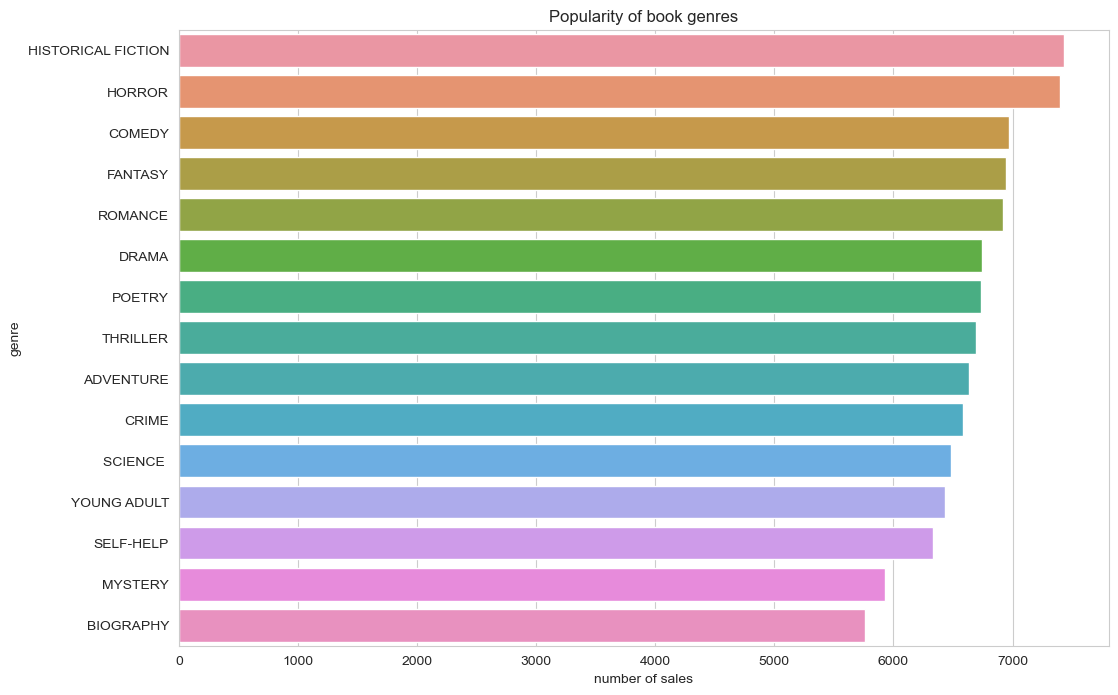

In [15]:
# Подсчет продаж по жанрам
sales_by_genre = data['genre_name'].value_counts()

# Визуализация результатов
plt.figure(figsize=(12, 8))
sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index)
plt.title('Popularity of book genres')
plt.xlabel('number of sales')
plt.ylabel('genre')
plt.show()


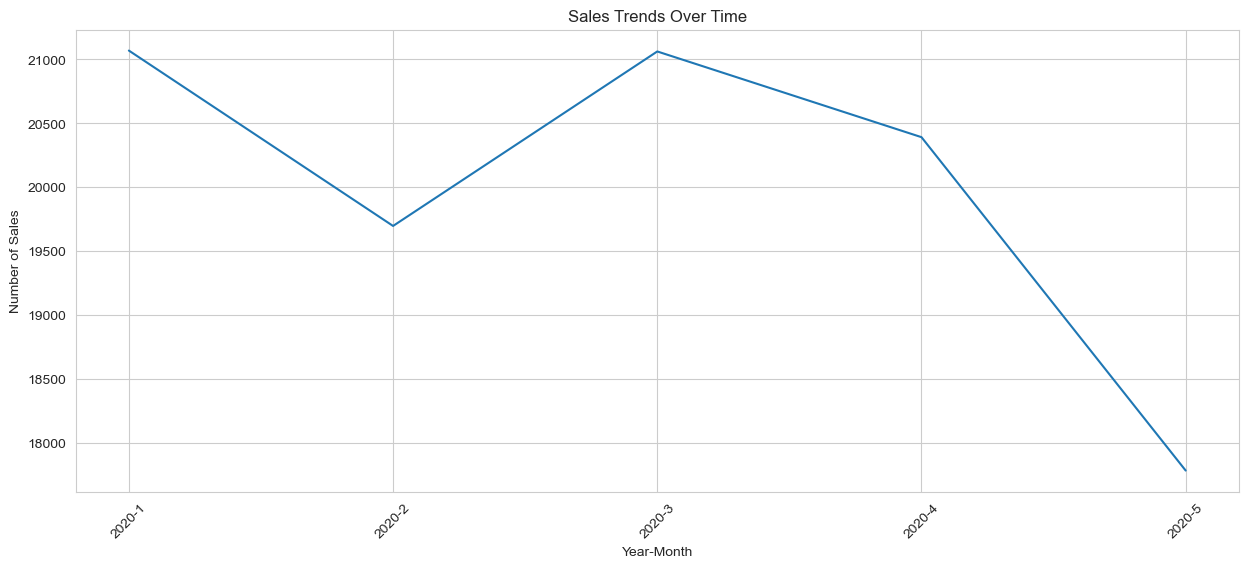

In [13]:
# Sales Trends Over Time: Analyze sales trends over time.

import matplotlib.pyplot as plt

# Extracting year and month for trend analysis
data['year'] = data['SALE_DATE_DT'].dt.year
data['month'] = data['SALE_DATE_DT'].dt.month

# Grouping data by year and month to see the trend
sales_trends = data.groupby(['year', 'month']).size().reset_index(name='sales_count')

# Plotting the sales trends over time
plt.figure(figsize=(15, 6))
plt.plot(sales_trends['year'].astype(str) + '-' + sales_trends['month'].astype(str), sales_trends['sales_count'])
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.show()



In [14]:
# Top Performing Books: Identify the top 10 best-selling books.

# Grouping data by book name and counting the number of sales
top_books = data.groupby('book_name').size().reset_index(name='sales_count')

# Sorting the books by sales count in descending order and selecting the top 10
top_books = top_books.sort_values(by='sales_count', ascending=False).head(10)

top_books


,book_name,sales_count
930,"FULL DARK, NO STARS (2010)",50
1110,"HOW LATE IT WAS, HOW LATE (1994)",47
1054,HEIR TO THE EMPIRE,47
786,ENNEADS,46
951,GENERAL INTRODUCTION TO PSYCHOANALYSIS,46
240,ARROW OF GOD (1964),46
3266,THE WIDE WINDOW (2000),45
1228,JACK THE RIPPER: THE FINAL SOLUTION (1976),44
3354,TOWARDS THE END OF THE MORNING (1967),44
899,FOUNTAINHEAD (1943),44


In [15]:
# Customer Segmentation: Segment customers based on country.

# Grouping data by country and calculating various metrics
customer_segmentation = data.groupby('country_name').agg(
    total_sales=('book_id', 'size'),
    average_price=('books_price', 'mean'),
    unique_books=('book_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

customer_segmentation.sort_values(by='total_sales', ascending=False)


,country_name,total_sales,average_price,unique_books,unique_customers
4,Poland,20206,10.879270,3550,3971
0,Belarus,20191,10.932780,3546,3973
1,Estonia,19947,10.966848,3549,3971
3,Lithuania,19926,10.901295,3556,3974
2,Latvia,19729,10.913568,3553,3974
